In [1]:
import pyLIMA

In [2]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import csv

from pyLIMA.fits import DE_fit
from pyLIMA.fits import TRF_fit
from pyLIMA.models import PSPL_model
from pyLIMA.models import USBL_model, pyLIMA_fancy_parameters
from pyLIMA.outputs import pyLIMA_plots

from pyLIMA import event
from pyLIMA import telescopes

In [3]:
your_event = event.Event(ra=262.75616,dec=-21.40123)
your_event.name = 'Gaia21bsg'

In [4]:
data_1 = np.loadtxt('data/star_20957_Gaia21bsg_fs01_ip_reduced.dat')
telescope_1 = telescopes.Telescope(name='Gaia_20957_i',
                                  camera_filter = 'I',
                                  light_curve = data_1.astype(float),
                                  light_curve_names = ['time','mag','err_mag'],
                                  light_curve_units = ['JD','mag','mag'])

data_2 = np.loadtxt('data/star_50085_Gaia21bsg_gp_reduced.dat')
telescope_2 = telescopes.Telescope(name='Gaia__50085_g',
                                  camera_filter = 'G',
                                  light_curve = data_2.astype(float),
                                  light_curve_names = ['time','mag','err_mag'],
                                  light_curve_units = ['JD','mag','mag'])

data_3 = np.loadtxt('data/star_79874_Gaia21bsg_ip_reduced.dat')
telescope_3 = telescopes.Telescope(name='Gaia_79874_i',
                                  camera_filter = 'I',
                                  light_curve = data_3.astype(float),
                                  light_curve_names = ['time','mag','err_mag'],
                                  light_curve_units = ['JD','mag','mag'])

In [ ]:
#plt.plot(data_3[:,0],data_3[:,1])

In [5]:
data_4 = np.loadtxt('data/atlas_c_filter.dat')
data_4[:,0] = data_4[:,0] + 2.4e6
telescope_4 = telescopes.Telescope(name='ATLAS_c',
                                  camera_filter = 'C',
                                  light_curve = data_4.astype(float),
                                  light_curve_names = ['time','mag','err_mag'],
                                  light_curve_units = ['JD','mag','mag'])

In [ ]:
#plt.plot(data_4[:,0],data_4[:,1],'o')

In [6]:
data_5 = np.loadtxt('data/atlas_o_filter.dat')
data_5[:,0] = data_5[:,0] + 2.4e6
telescope_5 = telescopes.Telescope(name='ATLAS_o',
                                  camera_filter = 'O',
                                  light_curve = data_5.astype(float),
                                  light_curve_names = ['time','mag','err_mag'],
                                  light_curve_units = ['JD','mag','mag'])

In [ ]:
#plt.plot(data_4[:,0],data_4[:,1])

In [7]:
data_6 = np.loadtxt('data/ztf_gaiabsg21_reduced.dat')
data_6[:,0] = data_6[:,0] + 2.4e6
telescope_6 = telescopes.Telescope(name='ZTF_r',
                                  camera_filter = 'R',
                                  light_curve = data_6.astype(float),
                                  light_curve_names = ['time','mag','err_mag'],
                                  light_curve_units = ['JD','mag','mag'])

In [ ]:
#plt.plot(data_5[:,0],data_5[:,1])

In [8]:
data_7 = np.loadtxt('data/reduced_gaia_data.dat',delimiter=',')
data_7[:,0] = data_7[:,0] + 2.4e6
telescope_7 = telescopes.Telescope(name='Gaia_g',
                                  camera_filter = 'G',
                                  light_curve = data_7.astype(float),
                                  light_curve_names = ['time','mag','err_mag'],
                                  light_curve_units = ['JD', 'mag','mag'])

In [29]:
data_7[0,0]

2457268.7399768517

# object id found via ztf: 281216400001763

In [10]:
your_event.telescopes.append(telescope_1)
your_event.telescopes.append(telescope_2)
your_event.telescopes.append(telescope_3)
your_event.telescopes.append(telescope_4)
your_event.telescopes.append(telescope_5)
your_event.telescopes.append(telescope_6)
your_event.telescopes.append(telescope_7)

In [11]:
your_event.find_survey('Gaia')

In [12]:
your_event.check_event()

check_event  : Everything looks fine...


In [13]:
from pyLIMA.models import PSPL_model
pspl = PSPL_model.PSPLmodel(your_event)

In [14]:
from pyLIMA.fits import DE_fit

In [15]:
my_fit = DE_fit.DEfit(pspl)

In [16]:
my_fit.fit_parameters

OrderedDict([('t0', [0, (2457268.7399768517, 2460119.920427)]),
             ('u0', [1, (0.0, 1.0)]),
             ('tE', [2, (0.1, 500)])])

In [17]:
my_fit.fit()

DE converge to objective function : f(x) =  74191.05490576227
DE converge to parameters : =  ['2459353.868924505' '0.9981139052171232' '1.1289066739087161']
fit  : Differential Evolution fit SUCCESS
best_model: [2.45935387e+06 9.98113905e-01 1.12890667e+00] -ln(likelihood) 74191.05490576227


In [18]:
my_fit.fit_results

{'best_model': array([2.45935387e+06, 9.98113905e-01, 1.12890667e+00]),
 '-(ln_likelihood)': 74191.05490576227,
 'fit_time': 8.599303722381592,
 'DE_population': array([[ 2.45983355e+06,  1.25990849e-01,  4.60169445e+02, ...,
         -1.10548483e+01,  1.53452471e+03,  1.55210611e+05],
        [ 2.45815264e+06,  9.64349991e-01,  4.09865016e+02, ...,
         -1.11158660e+03,  2.75554784e+03,  1.56598238e+05],
        [ 2.45970209e+06,  9.97798299e-01,  3.25740178e+02, ...,
          8.30159516e+02,  6.18402974e+02,  1.54803053e+05],
        ...,
        [ 2.45935388e+06,  9.96510627e-01,  1.13318670e+00, ...,
          8.25582104e+09, -8.25581963e+09,  7.41935311e+04],
        [ 2.45935387e+06,  9.98251949e-01,  1.14151909e+00, ...,
          8.01394846e+09, -8.01394704e+09,  7.41950700e+04],
        [ 2.45935388e+06,  9.96607678e-01,  1.12482180e+00, ...,
          8.50850429e+09, -8.50850288e+09,  7.41959333e+04]])}

In [19]:
my_fit.fit_results['best_model']

array([2.45935387e+06, 9.98113905e-01, 1.12890667e+00])

In [20]:
my_fit.fit_parameters.keys()

odict_keys(['t0', 'u0', 'tE'])

<IPython.core.display.Javascript object>


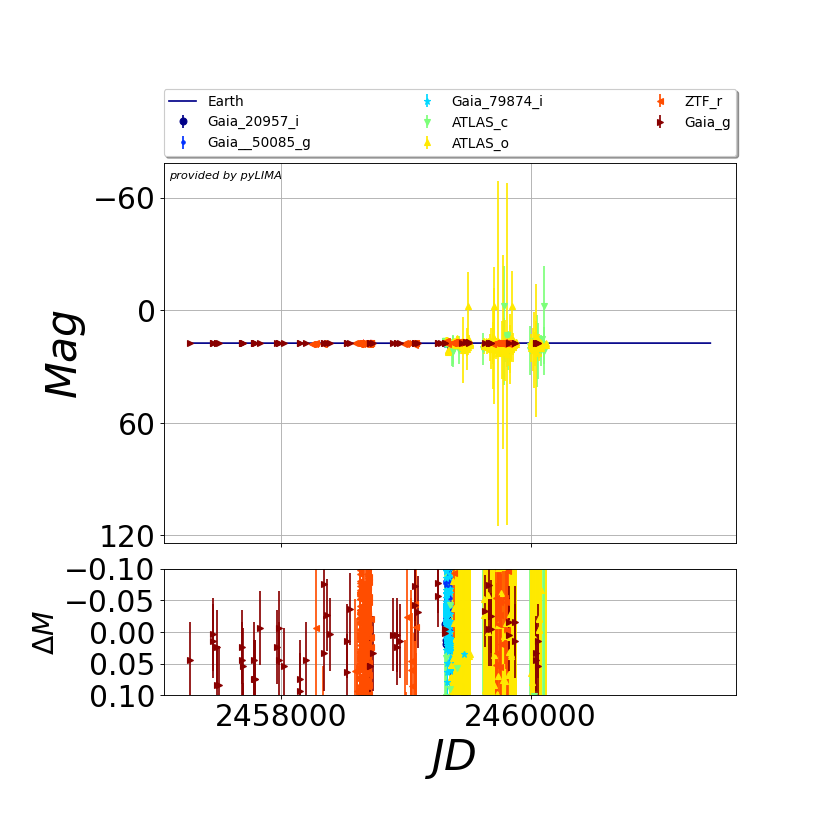

/home/ezequiel/pyLIMA-env/pyLIMA/pyLIMA/outputs/pyLIMA_plots.py:1017: RuntimeWarning: invalid value encountered in log10
  np.log10(ref_source * magni + ref_blend)
/home/ezequiel/pyLIMA-env/pyLIMA/pyLIMA/outputs/pyLIMA_plots.py:1112: RuntimeWarning: invalid value encountered in log10
  np.log10(model_flux)


In [21]:
from pyLIMA.outputs import pyLIMA_plots
pyLIMA_plots.plot_lightcurves(pspl,my_fit.fit_results['best_model'])
plt.show()

In [22]:
from pyLIMA.fits import LM_fit

In [23]:
my_fit2 = LM_fit.LMfit(pspl)

In [24]:
my_fit2.fit()

initial_guess  : Initial parameters guess SUCCESS
Using guess:  [2459346.5218862025, 1.0, 20.0, 8967.818203053135, 0.0, 555.7292324338752, 0.0, 2883.891295418017, 0.0, 91201083935.59077, 3702.7743089975324, 42936.50127031175, -42208.24053393578, 5764.557824945484, 0.0, 9204.495717531712, 0.0]
fit  : Levenberg-Marquardt fit SUCCESS
best_model: [2459344.469801324, 0.13498104591688367, 111.05374305002913, -1342.4234913112296, 14197.637769005052, 21.930847628911117, 187.72816111360575, 108.53949635519731, 816.8512752870173, -6.404050511205112, 1228.051030515249, 634.9835542893347, 46.80378915377567, 444.777451574659, 795.1336341800827, 2782.9828625825667, -1446.4617147977542]  chi2: 261851.60754530397


In [25]:
my_fit2.fit_results

{'best_model': [2459344.469801324,
  0.13498104591688367,
  111.05374305002913,
  -1342.4234913112296,
  14197.637769005052,
  21.930847628911117,
  187.72816111360575,
  108.53949635519731,
  816.8512752870173,
  -6.404050511205112,
  1228.051030515249,
  634.9835542893347,
  46.80378915377567,
  444.777451574659,
  795.1336341800827,
  2782.9828625825667,
  -1446.4617147977542],
 'chi2': 261851.60754530397,
 'fit_time': 1.9364147186279297,
 'covariance_matrix': array([[ 1.03846509e+00,  3.90453966e-03,  1.77937936e+00,
         -1.01660389e+02,  2.64290963e+02, -2.06306965e-01,
          1.83067945e+00, -1.18455300e+00,  1.24402505e+01,
          1.02076784e-02,  1.08312827e-01,  2.02992188e-01,
         -7.83087420e+00,  1.81650920e+00, -2.98627804e+00,
          3.81313239e+01, -4.17177217e+01],
        [ 3.90453966e-03,  1.22791208e-02, -8.81481299e+00,
         -1.26083540e+02,  8.09260362e+01,  2.19834321e+00,
         -1.88438486e+00,  1.08833415e+01, -9.44632210e+00,
         

In [26]:
my_fit2.fit_results['best_model']

[2459344.469801324,
 0.13498104591688367,
 111.05374305002913,
 -1342.4234913112296,
 14197.637769005052,
 21.930847628911117,
 187.72816111360575,
 108.53949635519731,
 816.8512752870173,
 -6.404050511205112,
 1228.051030515249,
 634.9835542893347,
 46.80378915377567,
 444.777451574659,
 795.1336341800827,
 2782.9828625825667,
 -1446.4617147977542]

In [27]:
my_fit2.fit_parameters.keys()

odict_keys(['t0', 'u0', 'tE', 'fsource_Gaia_20957_i', 'fblend_Gaia_20957_i', 'fsource_Gaia__50085_g', 'fblend_Gaia__50085_g', 'fsource_Gaia_79874_i', 'fblend_Gaia_79874_i', 'fsource_ATLAS_c', 'fblend_ATLAS_c', 'fsource_ATLAS_o', 'fblend_ATLAS_o', 'fsource_ZTF_r', 'fblend_ZTF_r', 'fsource_Gaia_g', 'fblend_Gaia_g'])

<IPython.core.display.Javascript object>


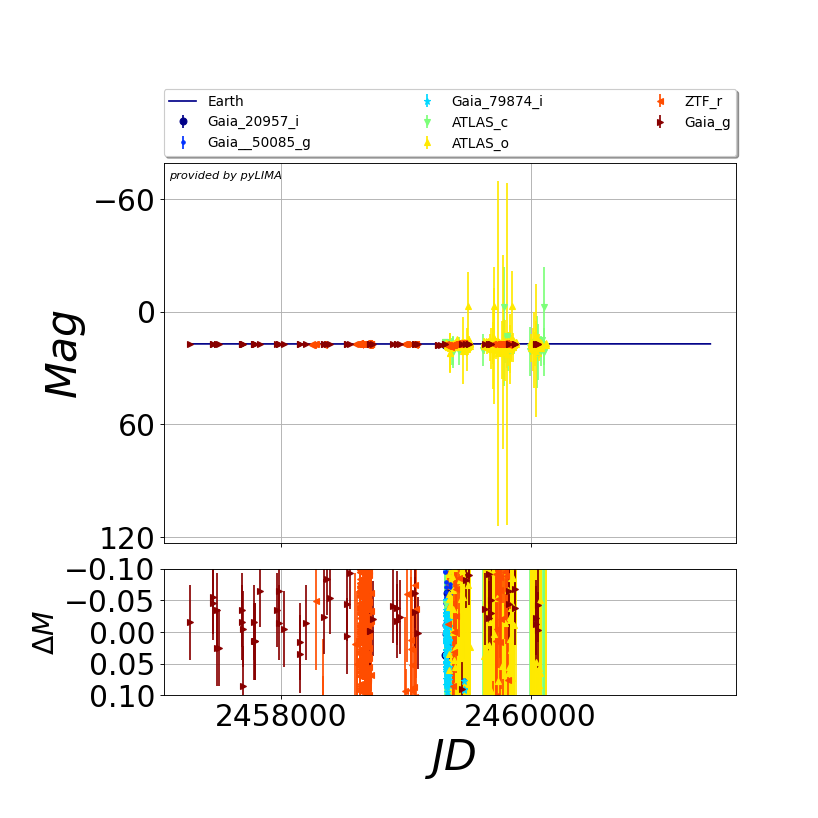

In [28]:
pyLIMA_plots.plot_lightcurves(pspl,my_fit2.fit_results['best_model'])
plt.savefig('output1.png')
plt.show()